In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '00787'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)


*** Entered Orchestrate Node ***

*** Entered Retrieve Node ***

Distance to neareast plan: 0.5461114645004272

*** Entered Initialize Node ***

Formulating a new plan to solve the task.

*** Entered Update Node ***

Updating plan based function documentation
The current plan looks good and is using the pybaseball functions correctly:

1. Import the necessary libraries:

```python
from pybaseball import playerid_lookup, statcast_pitcher 
import matplotlib.pyplot as plt
import pandas as pd
```

2. Look up Danny Duffy's MLBAM player ID: 

```python
duffy_id = playerid_lookup('duffy', 'danny').key_mlbam.iloc[0]  
```

3. Get Danny Duffy's statcast pitching data for the 2018 season:

```python
duffy_2018_data = statcast_pitcher('2018-03-29', '2018-09-30', player_id=duffy_id)
```

4. Filter to strikeouts, group by game date, count strikeouts, and calculate cumulative sum:

```python
duffy_2018_strikeouts = duffy_2018_data[duffy_2018_data.events.isin(['strikeout', 'strikeout_double_play'])]


*** Entered Orchestrate Node ***
Unknown plan. Executing with Opus

*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# 1. Import necessary libraries
from pybaseball import playerid_lookup, statcast_pitcher
import matplotlib.pyplot as plt 
import pandas as pd

*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# 2. Look up Danny Duffy's MLBAM player ID
duffy_id = playerid_lookup('duffy', 'danny').key_mlbam.iloc[0]
print(f"Danny Duffy's MLBAM player ID is {duffy_id}")

Result:
Gathering player lookup table. This may take a moment.
Danny Duffy's MLBAM player ID is 518633


*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# 3. Get Danny Duffy's statcast pitching data for the 2018 season 
duffy_2018_data = statcast_pitcher('2018-03-29', '2018-09-30', player_id=duffy_id)

Result:
Gathering Player Data


*** Entered Generate Node ***


*** Entered Execute Node ***


Executing:
# 4. Filter to strikeouts, group by game da

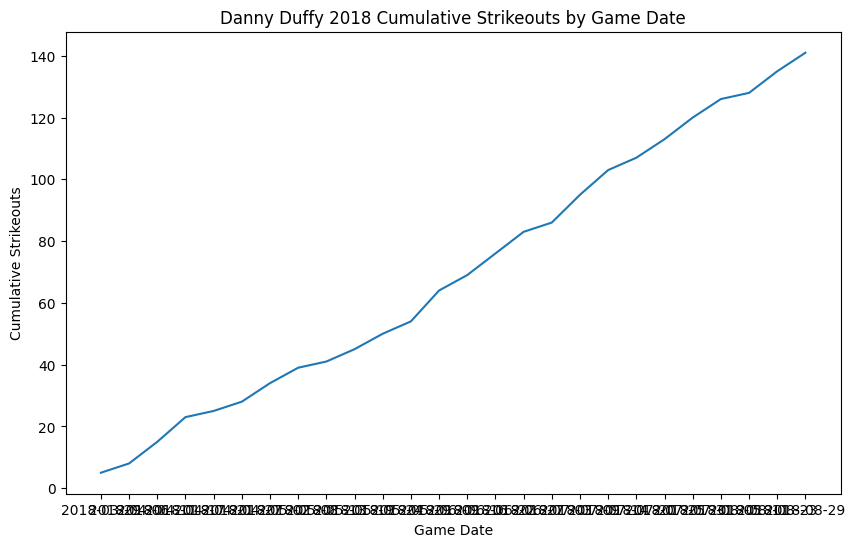


Result:
The plot shows Danny Duffy's cumulative strikeout total increasing over the course of the 2018 season, ending up at 141 total strikeouts.


*** Entered Generate Node ***


*** Entered Summarize Node ***

The plot shows Danny Duffy's cumulative strikeout total increasing over the course of the 2018 season, ending up at 141 total strikeouts.

Here is the code that was used to reach this solution:

```python

# 1. Import necessary libraries
from pybaseball import playerid_lookup, statcast_pitcher
import matplotlib.pyplot as plt 
import pandas as pd

# 2. Look up Danny Duffy's MLBAM player ID
duffy_id = playerid_lookup('duffy', 'danny').key_mlbam.iloc[0]
print(f"Danny Duffy's MLBAM player ID is {duffy_id}")

# 3. Get Danny Duffy's statcast pitching data for the 2018 season 
duffy_2018_data = statcast_pitcher('2018-03-29', '2018-09-30', player_id=duffy_id)

# 4. Filter to strikeouts, group by game date, count strikeouts, and calculate cumulative sum
duffy_2018_strikeouts = duffy_20

In [6]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [7]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)


*** Entered Orchestrate Node ***

*** Entered Memorize Node ***

Thank you, task has been commited to memory
